# Computer Vision for Beginners: Part 2

This is the second part of OpenCV tutorial for beginners and the complete set of the series is as follows:

- Part 1: Understanding color models and drawing figures on images 
- ***Part 2: The basics of image processing with filtering and gradients***
- Part 3: From feature detection to face detection 
- Part 4: Contour detection and having a little bit of fun 

Today we're going to talk about how to manipulate images. These are going to be a preprocessing stage. When it comes to detecting edges and contours, noise gives a great impact on the accuracy of detection. Therefore removing noises and controlling the intensity of the pixel values can help the model to focus on the general details and get higher accuracy. Blurring, thresholding, and morphological transformation are the techniques we use for this purpose.

This post assumes you are already familiar with the concept of convolution. But if it's not the case, I'd like to recommend you check this post first. The complete code for this tutorial is also available on Github. Now let's walk through how to apply image filtering with OpenCV one by one.

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

dir = '../'

In [17]:
def display(img, cmap = None):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap = cmap)

# Blurring

The goal of blurring is to perform noise reduction. But we have to pay extra care here. If we apply edge detection algorithms to the images with high resolution, we'll get too many detected outcomes that we aren't interested in.

![img](https://github.com/jjone36/vision_4_beginners/blob/master/images/part2_img1.png?raw=true)

On the contrary, if we blur the images too much, we'll lose the data. Therefore we need to find an adequate amount of blurring we're going to apply without losing desirable edges.

There are several techniques used to achieve blurring effects but we're going to talk about the four major ones used in OpenCV: **Averaging blurring, Gaussian blurring, median blurring** and **bilateral filtering**. All four techniques have a common basic principle, which is applying convolutional operations to the image with a filter (kernel). The values of the applying filters are different between the four blurring methods.

There are several ways for blurring effects and we're going to talk about the four mainly used types of techniques in OpenCV: Averaging blurring, Gaussian blurring, median blurring and bilateral filtering. The basic principle of them is the same, which is applying convolutional operations to the image with a filter or a kernel. The values of the applying filters are different between the four blurring methods.

***Average blurring*** is taking the average of all the pixel values under the given kernel area and replace the value at the center. For example, suppose we have a kernel with the size of 5X5. We calculate the average of the convoluted outcome and put that result to the center of the given area.

![img](https://github.com/jjone36/vision_4_beginners/blob/master/images/part2_img2.png?raw=true)

Then what will it be like if we increase the size of the kernel? As the size of filters gets bigger, the pixel values will be normalized more. Therefore we can expect the image to get blurred the more. Let's check out the result with the code as follows. (For comparison, I'll keep attaching the original image to the result)

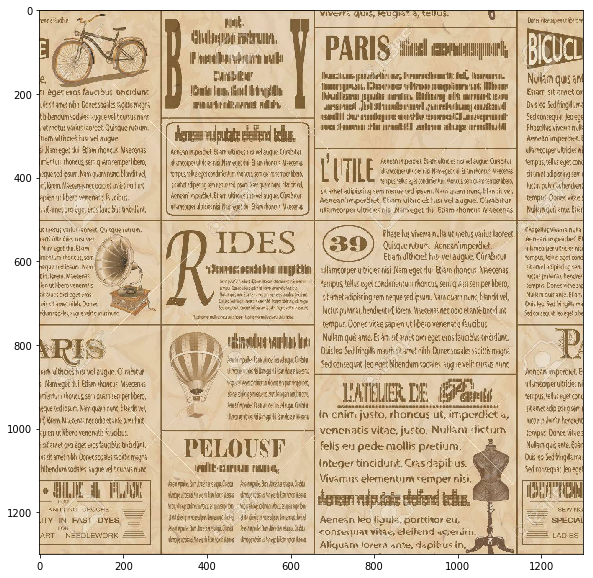

In [18]:
img_text = cv2.imread(dir + 'images/text.jpg')
img_text = cv2.cvtColor(img_text, cv2.COLOR_BGR2RGB)
display(img_text)

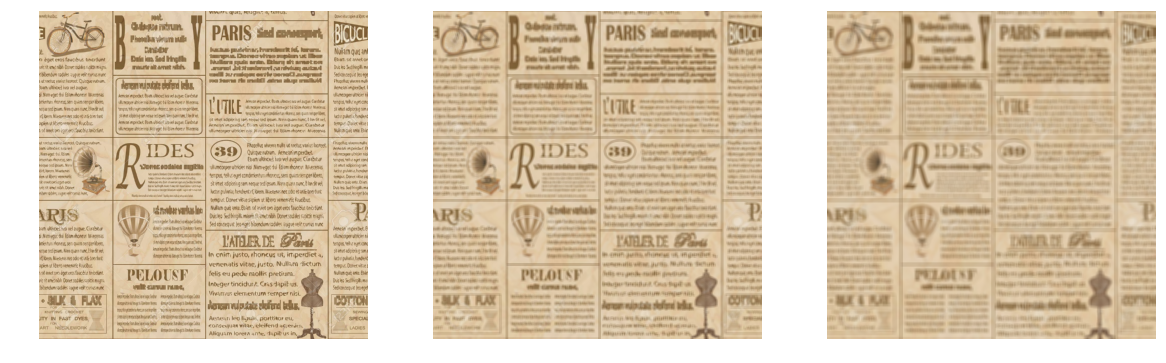

In [19]:
img = img_text.copy()
kernels = [5, 11, 17]

fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize = (20, 20))
for ind, s in enumerate(kernels):
    img_blurred = cv2.blur(img, ksize = (s, s))
    ax = axs[ind]
    ax.imshow(img_blurred)
    ax.axis('off')
plt.show()

***Medium blurring*** is the same with average blurring except that it uses the median value instead of the average. Therefore when we have to handle sudden noises in the image such as '[salt and pepper noise](https://en.wikipedia.org/wiki/Salt-and-pepper_noise),' it'll be better to use medium blurring than average blurring.

![img](https://github.com/jjone36/vision_4_beginners/blob/master/images/part2_img3.png?raw=true)

***Gaussian blurring*** is nothing but using the kernel whose values have a Gaussian distribution. The values are generated by a Gaussian function so it requires a sigma value for its parameter. As you can see the image above, the values of the kernel go higher near the center and go smaller near the corner. It's good to apply this method to [the noises that have a normal distribution](https://en.wikipedia.org/wiki/Gaussian_noise) such as [white noise](https://en.wikipedia.org/wiki/White_noise).

***Bilateral Filtering*** isan advanced version of Gaussian blurring. Blurring produces not only dissolving noises but also smoothing edges. And bilateral filter can keep edges sharp while removing noises. It uses Gaussian-distributed values but takes both distance and the pixel value differences into account. Therefore it requires `sigmaSpace` and `sigmaColor` for the parameters.

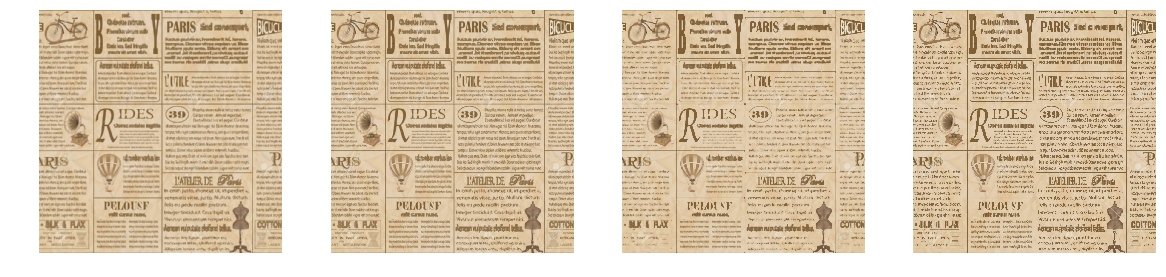

In [20]:
# Blur the image 
img_0 = cv2.blur(img, ksize = (7, 7))
img_1 = cv2.GaussianBlur(img, ksize = (7, 7), sigmaX = 0)   
img_2 = cv2.medianBlur(img, 7)
img_3 = cv2.bilateralFilter(img, 7, sigmaSpace = 75, sigmaColor =75)

# Plot the images
images = [img_0, img_1, img_2, img_3]
fig, axs = plt.subplots(nrows = 1, ncols = 4, figsize = (20, 20))

for ind, p in enumerate(images):
    ax = axs[ind]
    ax.imshow(p)
    ax.axis('off')
plt.show()

# Threshold 

Thresholding transforms images into binary images. We need to set the threshold value and max values and then we convert the pixel values accordingly. There are five different types of thresholding: **Binary, the inverse of Binary, Threshold to zero, the inverse of Threshold to Zero,** and **Threshold truncation.**

In [21]:
img = cv2.imread(dir + 'images/gradation.png')

In [22]:
# Thresholding
_, thresh_0 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
_, thresh_1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)
_, thresh_2 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO)
_, thresh_3 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO_INV)
_, thresh_4 = cv2.threshold(img, 127, 255, cv2.THRESH_TRUNC)

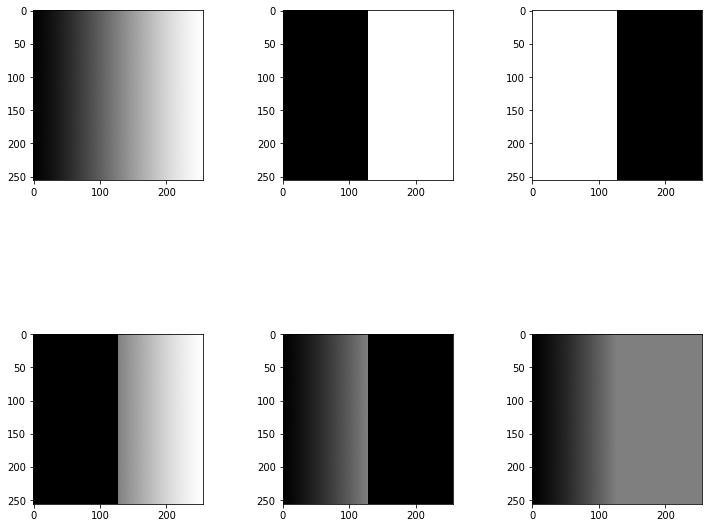

In [23]:
# Plot the images
images = [img, thresh_0, thresh_1, thresh_2, thresh_3, thresh_4]
fig, axs = plt.subplots(nrows = 2, ncols = 3, figsize = (10, 10))

for ind, p in enumerate(images):
    ax = axs[ind//3, ind%3]
    ax.imshow(p)
    
plt.tight_layout(w_pad = 5)
plt.show()

But don't you think it's too harsh to take just one value of threshold and apply it to all parts of an image? What if we have a picture with various amount of lighting in different areas? In this case, applying one value to the whole image would be a bad choice. A better approach would be using different thresholds for each part of the image. There is another technique called ***Adaptive thresholding***, which serves this issue. By calculating the threshold within the neighborhood area of the image, we can achieve a better result from images with varying illumination.

In [24]:
img_text = cv2.imread(dir + 'images/text.jpg')
img = cv2.cvtColor(img_text, cv2.COLOR_BGR2GRAY)

# Adaptive Thresholding
_, thresh_binary = cv2.threshold(img, thresh = 127, maxval = 255, type = cv2.THRESH_BINARY)
adap_mean_2 = cv2.adaptiveThreshold(img, 255, 
                                    cv2.ADAPTIVE_THRESH_MEAN_C, 
                                    cv2.THRESH_BINARY, 7, 2)
adap_mean_2_inv = cv2.adaptiveThreshold(img, 255, 
                                        cv2.ADAPTIVE_THRESH_MEAN_C, 
                                        cv2.THRESH_BINARY_INV, 7, 2)
adap_mean_8 = cv2.adaptiveThreshold(img, 255, 
                                    cv2.ADAPTIVE_THRESH_MEAN_C, 
                                    cv2.THRESH_BINARY, 7, 8)
adap_gaussian_8 = cv2.adaptiveThreshold(img, 255, 
                                        cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                        cv2.THRESH_BINARY, 7, 8)

We need to convert the color mode to grayscale to apply adaptive thresholding. The parameters of adaptive thresholding are `maxValue` (which I set 255 above), `adaptiveMethod`, `thresholdType`, `blockSize` and `C`. And the adaptive method here has two kinds: `ADAPTIVE_THRESH_MEAN_C` , `ADAPTIVE_THRESH_GAUSSIAN_C` . Let's just see how images are produced differently.

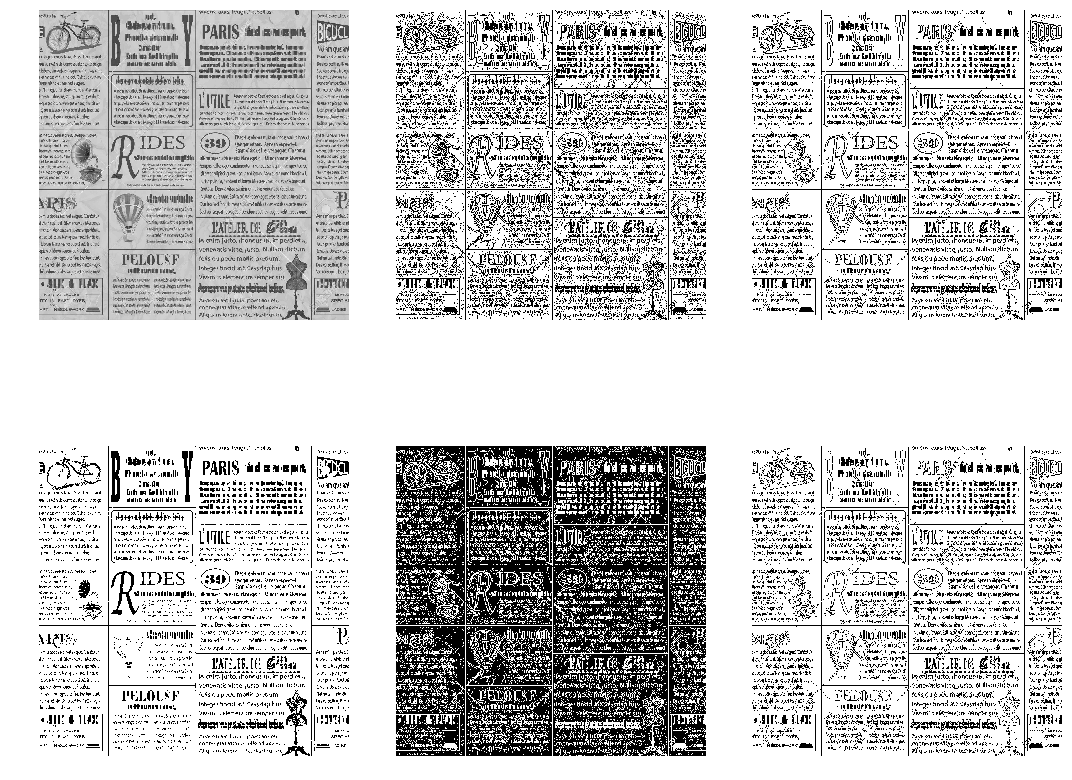

In [25]:
# Plot the images
images = [img, thresh_binary, adap_mean_2, adap_mean_2_inv, adap_mean_8, adap_gaussian_8]
fig, axs = plt.subplots(nrows = 2, ncols = 3, figsize = (15, 13))

for ind, p in enumerate(images):
    ax = axs[ind%2, ind//2]
    ax.imshow(p, cmap = 'gray')
    ax.axis('off')
    
plt.tight_layout()
plt.show()

We have the original image and the one with binary thresholding on the left line. Compare this with the second and third image on the upper line, which is produced by `ADAPTIVE_THRESH_MEAN_C`. It shows a more detailed result than that of binary thresholding. We can also see that it gets more explicit when the C value is bigger. `C` indicates how much we'll subtract from the mean or weighted mean. With the two images on the right line, we can also compare the effect of `ADAPTIVE_THRESH_MEAN_C` and `ADAPTIVE_THRESH_GAUSSIAN_C` with the same C value.

# Gradient

I believe we are already familiar with the concept of gradients. In mathematics, the [gradient](https://en.wikipedia.org/wiki/Gradient) geometrically represents the slope of the graph of a function with multi-variables. As it is a vector-valued function, it takes a direction and a magnitude as its components. Here we can also bring the same concept to the pixel values of images as well. The [image gradient](https://en.wikipedia.org/wiki/Image_gradient) represents directional changes in the intensity or color mode and we can use this concept for locating edges.

***Sobel operation*** uses both Gaussian smoothing and differentiation. We apply it by `cv2.Sobel()` and two different directions are available: vertical (`sobel_x`) and horizontal (`sobel_y`). `dx` and `dy` indicates the derivatives. When `dx = 1`, the operator calculates the derivatives of the pixel values along the horizontal direction to make a filter. 

We can also apply in both directions by summing the two filters of `sobel_x` and `sobel_y`. With the function `cv2.addWeighted()`, we can calculate the weighted sum of the filters. As you can see above in the code cell, I gave the same amount of weight to the two filters. 

***Laplacian operation*** uses the second derivatives of x and y. The mathematical expression is shown below.
![img](https://github.com/jjone36/vision_4_beginners/blob/master/images/part2_img5.png?raw=true)

In [26]:
# Apply gradient filtering
sobel_x = cv2.Sobel(img, cv2.CV_64F, dx = 1, dy = 0, ksize = 5)
sobel_y = cv2.Sobel(img, cv2.CV_64F, dx = 0, dy = 1, ksize = 5)
blended = cv2.addWeighted(src1=sobel_x, alpha=0.5, src2=sobel_y, beta=0.5, gamma=0)
laplacian = cv2.Laplacian(img, cv2.CV_64F)

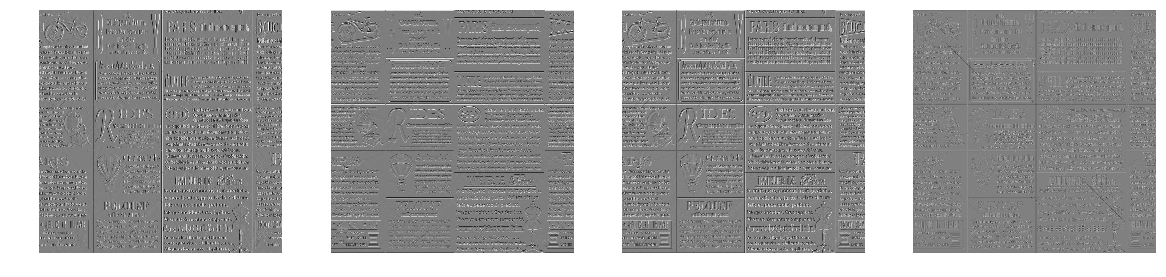

In [27]:
# Plot the images
images = [sobel_x, sobel_y, blended, laplacian]

plt.figure(figsize = (20, 20))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(images[i], cmap = 'gray')
    plt.axis('off')
plt.show()

It's apparent that the first and second image have a directional pattern. With the first image, we can clearly see the edges in the vertical direction. With the second image, we can see the horizontal edges. And both the third and fourth images, the edges on both directions are shown.

# Morphological transformations

It's also possible to manipulate the figures of images by filtering, which is called as **morphological transformation**. Let's talk about erosion and dilation first.

***Erosion*** is the technique for shrinking figures and it's usually processed in a grayscale. The shape of filters can be a rectangle, an ellipse, and a cross shape. By applying a filter we remove any 0 values under the given area.

![img](https://github.com/jjone36/vision_4_beginners/blob/master/images/part2_img6.png?raw=true)

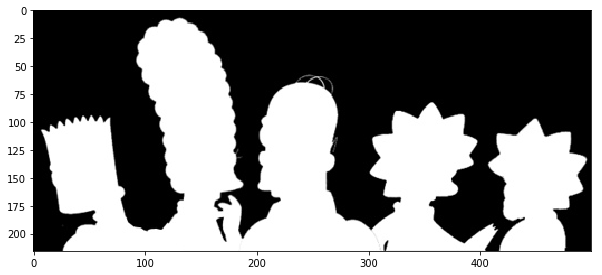

In [28]:
img = cv2.imread(dir + 'images/simpson.jpg')
img = cv2.bitwise_not(img)
display(img)

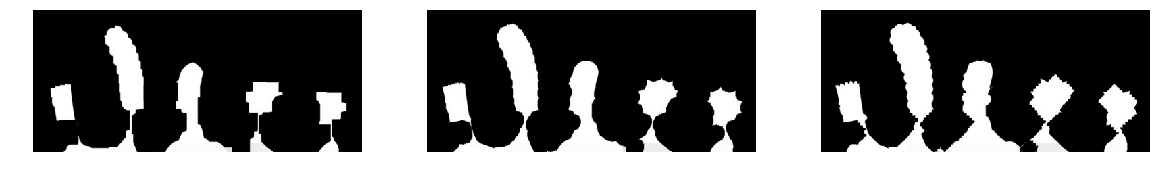

In [29]:
# Create the erosion kernels
kernel_0 = np.ones((9, 9), np.uint8)
kernel_1 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (9, 9))
kernel_2 = cv2.getStructuringElement(cv2.MORPH_CROSS, (9, 9))
kernels = [kernel_0, kernel_1, kernel_2]

# Plot the images
plt.figure(figsize = (20, 20))
for i in range(3):
    img_copy = img.copy()
    img_copy = cv2.erode(img_copy, kernels[i], iterations = 3)
    plt.subplot(1, 3, i+1)
    plt.imshow(img_copy)
    plt.axis('off')
plt.show()

Check out how the Simpson's family shrank with different types of kernels applied. (Sorry to Simpson for losing his hands!) We can see the image with the ellipse filter is eroded in a "round" way while the one with the basic filter with a squared shape is eroded in a "linear" way. The last one with the cross filter shows it shrank in a "diagonal" way.

**Dilation** is the opposite to erosion. It is making objects expand and the operation will be also be opposite to that of erosion. Let's check out the result with the code as follows.

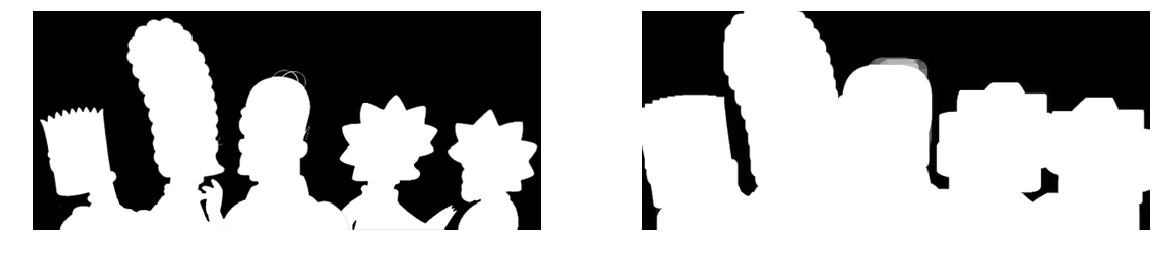

In [30]:
kernel = np.ones((9, 9), np.uint8)
img_dilate = cv2.dilate(img, kernel, iterations = 3)

plt.figure(figsize = (20, 10))
plt.subplot(1, 2, 1); plt.imshow(img, cmap="gray")
plt.axis('off')
plt.subplot(1, 2, 2); plt.imshow(img_dilate, cmap="gray")
plt.axis('off')
plt.show()

is the mixed version of erosion and dilation. Opening performs erosion first and then dilation is performed on the result from the erosion while closing performs dilation first and the erosion.

![img](https://github.com/jjone36/vision_4_beginners/blob/master/images/part2_img7.png?raw=true)

As you can see the picture above, closing is useful to detect the overall contour of a figure and opening is suitable to detect subpatterns. We can implement these operators with the function `cv2.morphologyEx()` shown below. The parameter `op` indicates which type of operator we're going to use.

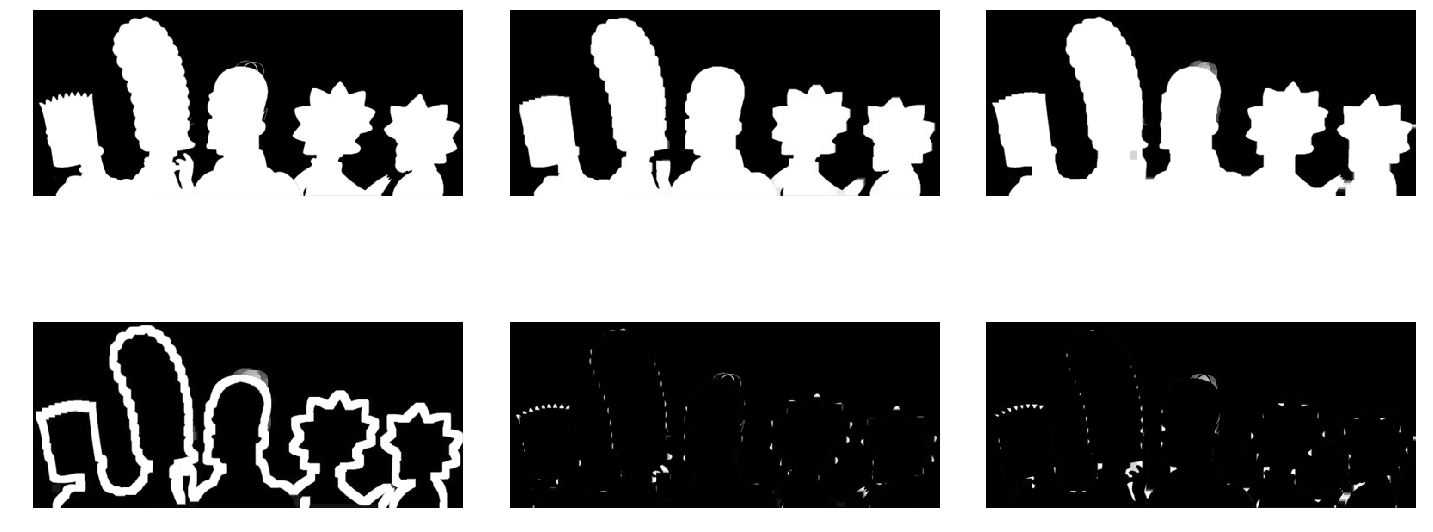

In [31]:
img_open = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
img_close = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
img_grad = cv2.morphologyEx(img, cv2.MORPH_GRADIENT,kernel)
img_tophat = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernel)
img_blackhat = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, kernel)

images = [img, img_open, img_close, img_grad, img_tophat, img_blackhat]

plt.figure(figsize = (20, 10))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i], cmap = 'gray')
    plt.axis('off')
    
plt.tight_layout()
plt.show()

Note that the Simpson's hand is depicted differently in the images with the opening filter and closing filter. Gradient filter (`MORPH_CGRADIENT`) is the subtracted area from dilation to erosion. Top hat filter (`MORPH_TOPHAT`) is the subtracted area from opening to the original image while black hot filter (`MORPH_BLACKHAT`) is that from closing. I'd recommend you to visit [here](https://homepages.inf.ed.ac.uk/rbf/HIPR2/morops.htm) to get further explanations on morphological operators.